In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer

sns.set(style='white', context='notebook', palette='deep')

# Introduction

Output : Target_flag ie car in a crash (1) or no (0)

Based on some inputs, auto insurance company wants to predict if person was involved in a car accident

## Load and check data

In [128]:
train_set=pd.read_csv('train_auto.csv',sep=',')
test_set=pd.read_csv('test_auto.csv',sep=',')
## Do not need this column
train_set=train_set.drop('TARGET_AMT',axis=1)
test_set=test_set.drop('TARGET_AMT',axis=1)

### Describe Data

In [129]:
print(train_set.columns)

Index(['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')


In [130]:
train_set.head()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0,60.0,0,11.0,"$67,349",No,$0,z_No,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


Different types : numeric and categorical. Same columns for train and test

In [131]:
print(len(train_set.columns))
print(len(test_set.columns))
train_set.columns == test_set.columns

25
25


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### Look at the types of columns

Numerical and categorical columns 

For some columns, output is in $ and considered as object. Consider to change them into float

In [132]:
train_set.dtypes

INDEX            int64
TARGET_FLAG      int64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

### Find number of categorical and numeric columns 

In [133]:
len([col for col in train_set.columns if train_set[col].dtype == 'object'])

14

From now, 14 categorical columns and 11 numeric columns

### Check for missing values

In [134]:
#Fill missing values with NaN
train_set = train_set.fillna(np.nan)
test_set=test_set.fillna(np.nan)


In [135]:
train_set.info()
print('_'*40)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8155 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          7707 non-null   float64
 6   INCOME       7716 non-null   object 
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     7697 non-null   object 
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          7635 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   object 
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCLA

In [136]:
print(train_set.isnull().sum())
print(test_set.isnull().sum())

INDEX            0
TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64
INDEX             0
TARGET_FLAG    2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

Columns with missing values in Training :
- AGE
- YOJ
- INCOME
- HOME_VAL
- JOB
- CAR_AGE

- After conversion into numeric for columns with $, it will remain 1 categorical column with missing value : JOB

- The other columns are numeric

- For YOJ, INCOME, HOME_VAL, JOB and CAR_AGE, 6% average of missing value for train_set


- Test_set has two other columns with missing values : TARGET_FLAG (logic because prediction) and TARGET_AMT (consider to drop this column because no use here)

#### Test and Train have identical number of columns with missing values
-> Easier for imputation/Encoding

#### Before summarizing, modify columns with $ and convert to float

In [137]:
doll_col=[col for col in train_set.columns if train_set[col].astype("str").str.contains("\$").any()]

for col in doll_col:
    train_set[col] = train_set[col].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
    test_set[col] = test_set[col].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
   

In [138]:
train_set.dtypes    

INDEX            int64
TARGET_FLAG      int64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK       float64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

#### 4 columns converted

### Look at unique values

Mark categorical and numeric columns

In [139]:
cat_cols=[col for col in train_set.columns if train_set[col].dtypes == 'object']
num_cols=[col for col in train_set.columns if train_set[col].dtypes != 'object']
print(cat_cols)
print(num_cols)
train_copy=train_set.copy()
test_copy=test_set.copy()

['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']


Print values taken by categorical columns

In [140]:
for col in cat_cols:
    print(col,train_set[col].unique())

PARENT1 ['No' 'Yes']
MSTATUS ['z_No' 'Yes']
SEX ['M' 'z_F']
EDUCATION ['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']
JOB ['Professional' 'z_Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' nan
 'Home Maker' 'Student']
CAR_USE ['Private' 'Commercial']
CAR_TYPE ['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Panel Truck' 'Pickup']
RED_CAR ['yes' 'no']
REVOKED ['No' 'Yes']
URBANICITY ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


- Lot of binary variables
- Education : from least to highest educated
- Job: great variation
- For binary variables, consider to transform them into 0,1
- Rename columns and unique values for always having 'Yes' and 'No'
- Remove 'z_'

## Summarize data and statistics

### Distribution of numerical columns

- ##### Age 

    Normal distribution

- ##### Bluebook, Income:

    A lot of data for low values. Consider maybe log normalization

- ##### Car Age : 

    Lot of values for age = 1. Also value = -3, change it to 0

- ##### Clm_freq : 

    lot of claim frequency = 0

- ##### Kids Driving, record points, olclaim, time if force, home_val

    Lots of low values 
    -> Interesting to look at the influence of target_flag, maybe binary and bands

- ##### Target_flag : 

    75% of 0. Hope it will not infuence data. Largely imbalanced
    -> Accuracy score not good
   
    
    
- ##### Year of job :

    Lots of data for 0 : maybe consider binary

##### We should use precision as metrics as there is large number of negative values and precision not affected by number of negatives

What is home_val : maybe value =0 means they don't own the house

In [141]:
train_set.describe()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,2978.893962,0.440728,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


In [142]:
train_set.TARGET_FLAG.value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

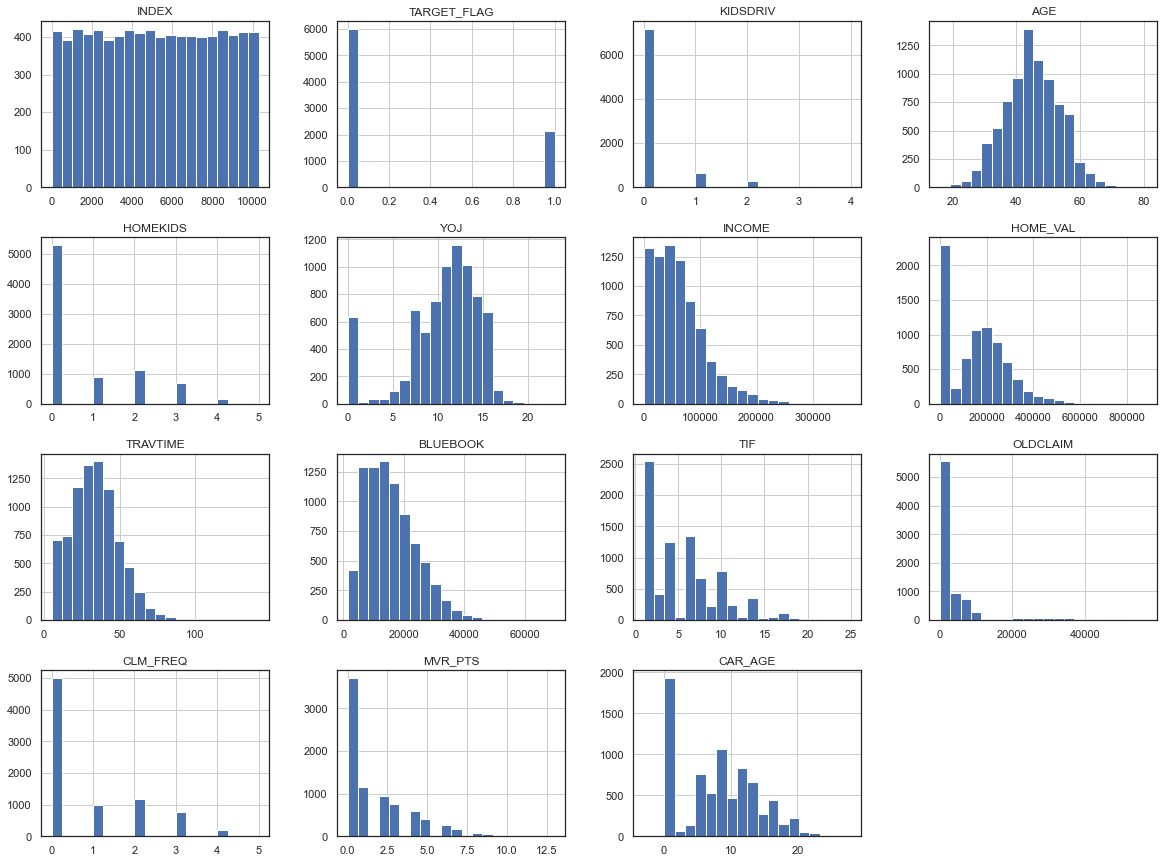

In [143]:
train_set.hist(bins=20, figsize=(20,15))
plt.show

### Distribution of categorical columns

In [144]:
train_set.describe(include=['O'])

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,8161,8161,8161,8161,7635,8161,8161,8161,8161,8161
unique,2,2,2,5,8,2,6,2,2,2
top,No,Yes,z_F,z_High School,z_Blue Collar,Private,z_SUV,no,No,Highly Urban/ Urban
freq,7084,4894,4375,2330,1825,5132,2294,5783,7161,6492


- Parent1 : majority of double parents

- Mstatus : equal married/not married

- Sex : equal M/F

Now we look at each column and its correlation with target_flag 

# Feature analysis

## Numerical columns

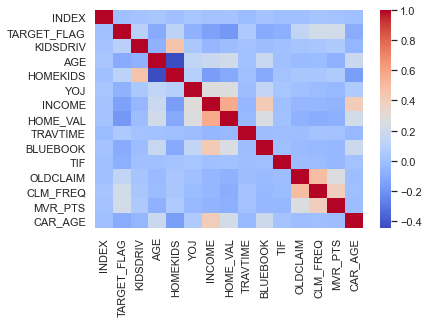

In [145]:
g = sns.heatmap(train_set.corr(),annot=False, fmt = ".2f", cmap = "coolwarm") #annot=True

- Target_flag influenced a little bit by Claim frequency and record points. Positively correlated
- Target_flag negatively correlated with home_val and income : Rich people drive more safely ?
- Homekids positively correlated with Kidsdriv
- Car_age positively correlated with income

#### Now look at each column and its dependence with target_flag

First look at variable with few number of outputs

### Kidsdrive

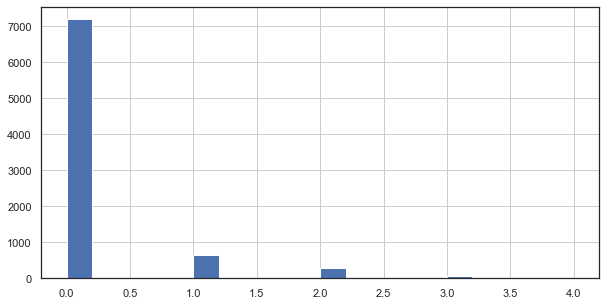

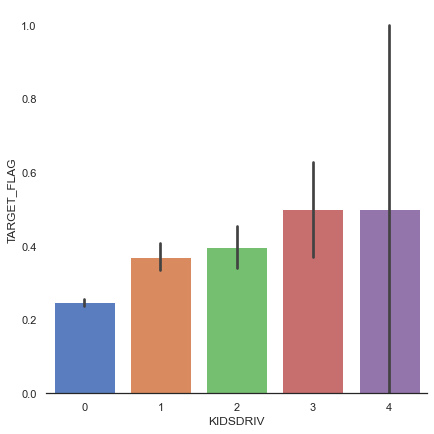

In [146]:
train_set['KIDSDRIV'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="KIDSDRIV",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")

Considering large majority of kidsdriv = 0, consider changing it to binary variable. Because target_flag does not change that much with # of kidsdriv


### Home Kids

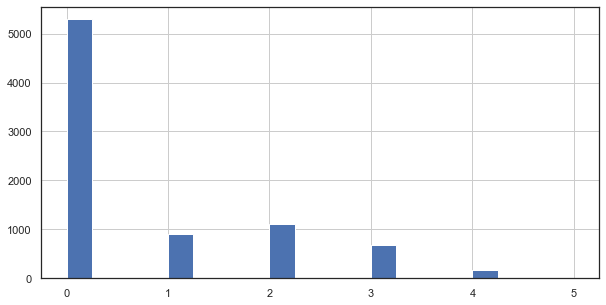

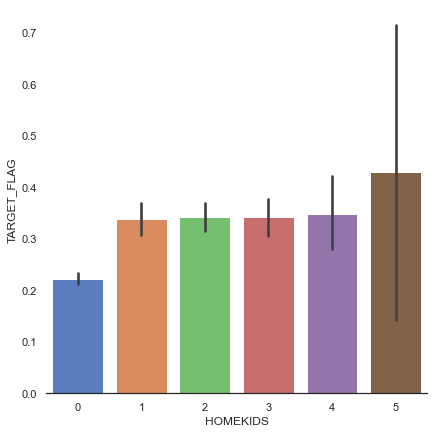

In [147]:
train_set['HOMEKIDS'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="HOMEKIDS",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")

Similar to kidsdriv consider changing it to binary variable. Because target_flag does not change that much with # of kidsdriv

### Claim Frequency

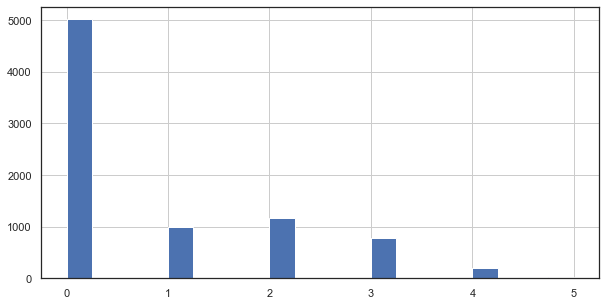

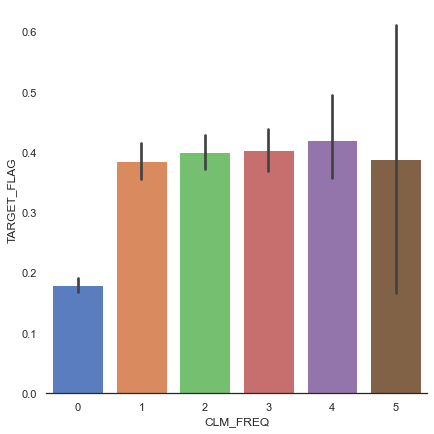

In [148]:
train_set['CLM_FREQ'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="CLM_FREQ",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")

Similar to kidsdriv consider changing it to binary variable. Because target_flag does not change that much with # of CLM_FREQ when claim >1

Rename columns and changing them to binary variables



### Motor vehicle record points

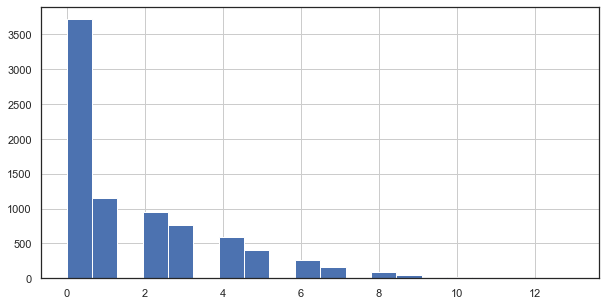

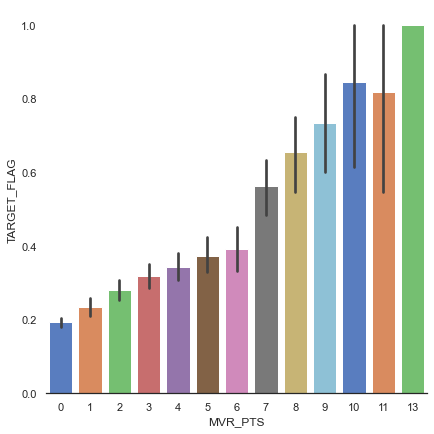

In [149]:
train_set['MVR_PTS'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="MVR_PTS",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")

Increase linearly with record points : maybe consider bands with value 0,1,2. Band1 = 0, band2width = 3
Or keep like that, it is quite linear


### TravTime

<function matplotlib.pyplot.show(close=None, block=None)>

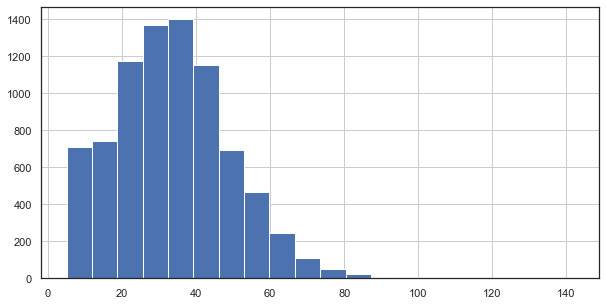

In [150]:
train_set['TRAVTIME'].hist(bins=20, figsize=(10,5))
plt.show

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


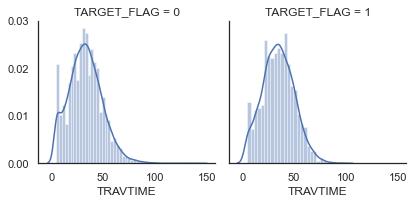

In [151]:
g = sns.FacetGrid(train_set, col='TARGET_FLAG')
g = g.map(sns.distplot, "TRAVTIME") #distplot
#g = g.set(xlim=(0,25000),ylim=(0,200))

Slightly shifted on the right : people with larger commuter times tend to crash more often. For those with quasi null travel time, there is more probability not to have a car crash. We should keep this column

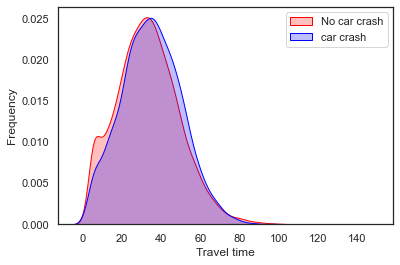

In [152]:
# Explore travtime distibution 
g = sns.kdeplot(train_set["TRAVTIME"][(train_set["TARGET_FLAG"] == 0) & (train_set["TRAVTIME"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["TRAVTIME"][(train_set["TARGET_FLAG"] == 1) & (train_set["TRAVTIME"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Travel time")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

### BLUEBOOK

In [153]:
corr_matrix=train_set.corr()
corr_matrix["BLUEBOOK"].sort_values(ascending=False)

BLUEBOOK       1.000000
INCOME         0.429280
HOME_VAL       0.259533
CAR_AGE        0.189758
AGE            0.165025
YOJ            0.143465
INDEX          0.013912
TIF           -0.005425
TRAVTIME      -0.017001
KIDSDRIV      -0.021549
OLDCLAIM      -0.029518
CLM_FREQ      -0.036341
MVR_PTS       -0.039131
TARGET_FLAG   -0.103383
HOMEKIDS      -0.107894
Name: BLUEBOOK, dtype: float64

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


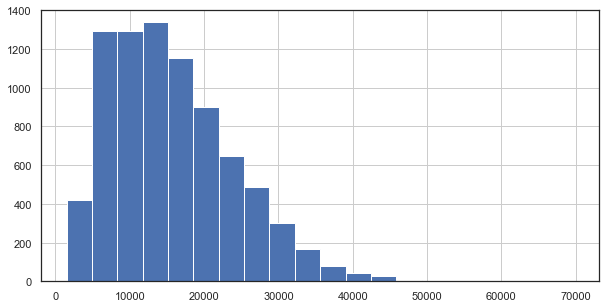

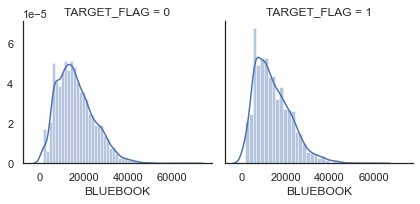

In [154]:
train_set['BLUEBOOK'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.FacetGrid(train_set, col='TARGET_FLAG')
g = g.map(sns.distplot, "BLUEBOOK") #distplot
#g = g.set(xlim=(0,25000),ylim=(0,200))



In [155]:
dfc=train_set.copy()
dfc['Bluebookband'] = pd.cut(dfc['BLUEBOOK'], 10)
dfc[['Bluebookband', 'TARGET_FLAG']].groupby(['Bluebookband'], as_index=False).mean().sort_values(by='Bluebookband', ascending=True)

,Bluebookband,TARGET_FLAG
0,"(1431.76, 8324.0]",0.348511
1,"(8324.0, 15148.0]",0.268719
2,"(15148.0, 21972.0]",0.229157
3,"(21972.0, 28796.0]",0.230634
4,"(28796.0, 35620.0]",0.162741
5,"(35620.0, 42444.0]",0.243902
6,"(42444.0, 49268.0]",0.250000
7,"(49268.0, 56092.0]",0.333333
8,"(56092.0, 62916.0]",0.666667
9,"(62916.0, 69740.0]",0.000000


People with larger_value car tend to crash less often. But the correlation is not that strong there is not much difference between all ranges of bluebook. We may drop it if it's useless.

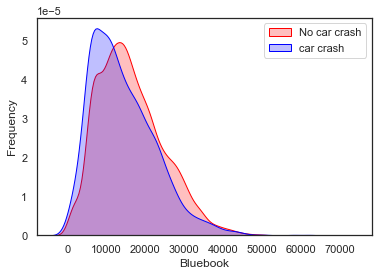

In [156]:
# Explore blubook distibution 
g = sns.kdeplot(train_set["BLUEBOOK"][(train_set["TARGET_FLAG"] == 0) & (train_set["BLUEBOOK"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["BLUEBOOK"][(train_set["TARGET_FLAG"] == 1) & (train_set["BLUEBOOK"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Bluebook")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

### Time in force

No strong correlation between TIF and Target. Not sure if we want to keep this variable but let's keep it for now

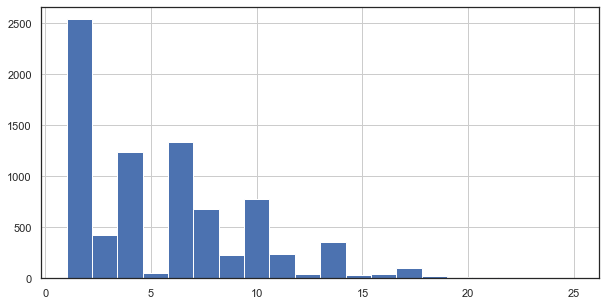

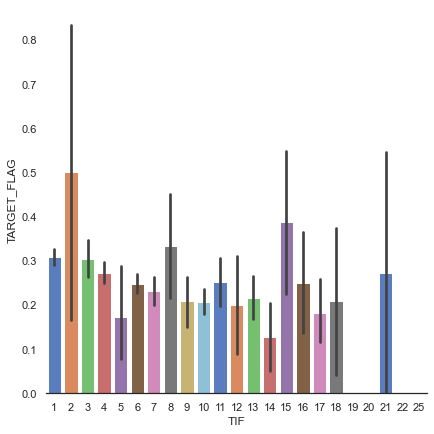

In [157]:
train_set['TIF'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="TIF",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")

### Old Claim

Extremely centered in 0 : Logically, people with no claim have no car crash. I suggest transforming into binary or removing the column
Also very correlated to claim freq : maybe remove because the two columns are colinear

<function matplotlib.pyplot.show(close=None, block=None)>

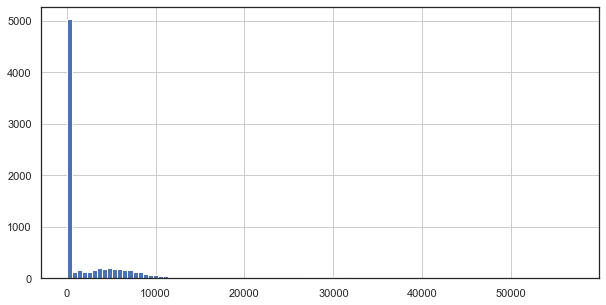

In [158]:
train_set['OLDCLAIM'].hist(bins=100, figsize=(10,5))
plt.show

#g = g.set(xlim=(0,25000),ylim=(0,200))


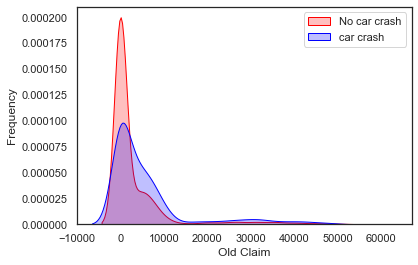

In [159]:
# Explore blubook distibution 
g = sns.kdeplot(train_set["OLDCLAIM"][(train_set["TARGET_FLAG"] == 0) & (train_set["OLDCLAIM"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["OLDCLAIM"][(train_set["TARGET_FLAG"] == 1) & (train_set["OLDCLAIM"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Old Claim")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

### AGE

In [160]:
corr_matrix=train_set.corr()
corr_matrix["AGE"].sort_values(ascending=False)

AGE            1.000000
HOME_VAL       0.209984
INCOME         0.180970
CAR_AGE        0.176221
BLUEBOOK       0.165025
YOJ            0.136072
INDEX          0.033846
TRAVTIME       0.005269
TIF           -0.000066
CLM_FREQ      -0.024092
OLDCLAIM      -0.029290
MVR_PTS       -0.071575
KIDSDRIV      -0.075179
TARGET_FLAG   -0.103217
HOMEKIDS      -0.445441
Name: AGE, dtype: float64

Age is positively correlated to Home_val,income, car_age, bluebook and negatively correlated with kids at home: if you are old, your children are no longer at home

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


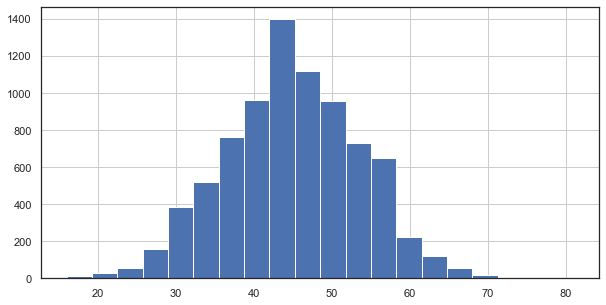

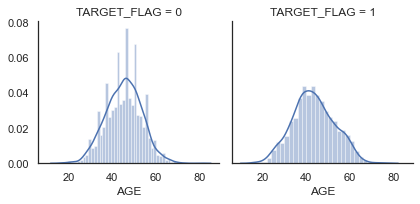

In [161]:
train_set['AGE'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.FacetGrid(train_set, col='TARGET_FLAG')
g = g.map(sns.distplot, "AGE") #distplot
#g = g.set(xlim=(0,25000),ylim=(0,200))

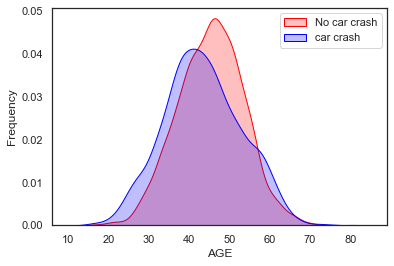

In [162]:
g = sns.kdeplot(train_set["AGE"][(train_set["TARGET_FLAG"] == 0) & (train_set["AGE"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["AGE"][(train_set["TARGET_FLAG"] == 1) & (train_set["AGE"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("AGE")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

Younger people tend to crash more often. 

In [163]:
dfc=train_set.copy()
dfc['AgeBand'] = pd.cut(dfc['AGE'], 6)
dfc[['AgeBand', 'TARGET_FLAG']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,TARGET_FLAG
0,"(15.935, 26.833]",0.604478
1,"(26.833, 37.667]",0.342175
2,"(37.667, 48.5]",0.249534
3,"(48.5, 59.333]",0.207625
4,"(59.333, 70.167]",0.324405
5,"(70.167, 81.0]",0.444444


##### We see that people older than 26 have nearly constant risk of having an accident. We can maybe replace Age by 0 ou 1

### INCOME

In [164]:
corr_matrix=train_set.corr()
corr_matrix["INCOME"].sort_values(ascending=False)

INCOME         1.000000
HOME_VAL       0.575244
BLUEBOOK       0.429280
CAR_AGE        0.414238
YOJ            0.286074
AGE            0.180970
INDEX          0.008821
TIF           -0.001035
OLDCLAIM      -0.045442
TRAVTIME      -0.047082
KIDSDRIV      -0.047134
CLM_FREQ      -0.047752
MVR_PTS       -0.063159
TARGET_FLAG   -0.142008
HOMEKIDS      -0.159330
Name: INCOME, dtype: float64

Highly correlated to home_val, bluebook, car_age

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


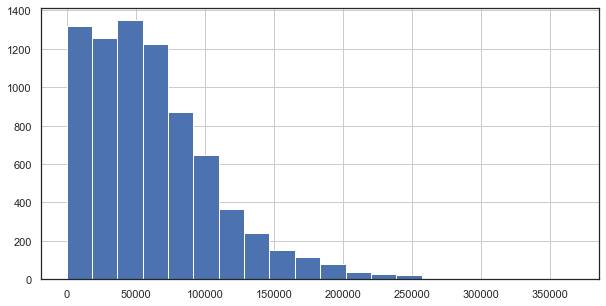

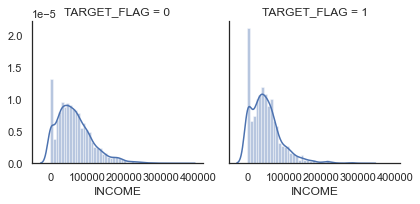

In [165]:
train_set['INCOME'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.FacetGrid(train_set, col='TARGET_FLAG')
g = g.map(sns.distplot, "INCOME") #distplot
#g = g.set(xlim=(0,25000),ylim=(0,200))

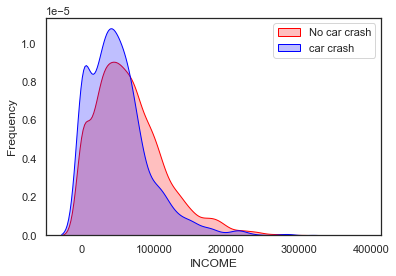

In [166]:
g = sns.kdeplot(train_set["INCOME"][(train_set["TARGET_FLAG"] == 0) & (train_set["INCOME"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["INCOME"][(train_set["TARGET_FLAG"] == 1) & (train_set["INCOME"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("INCOME")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

##### I suggest we keep this value. It is right-skewed, it would be good to do a log transformation

### YOJ

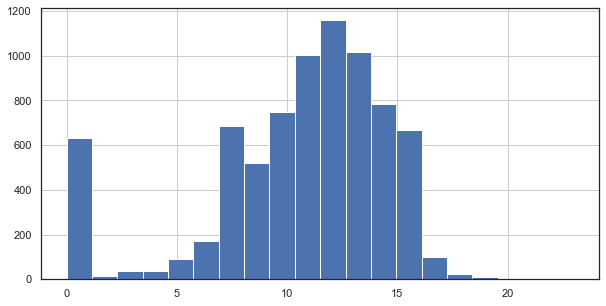

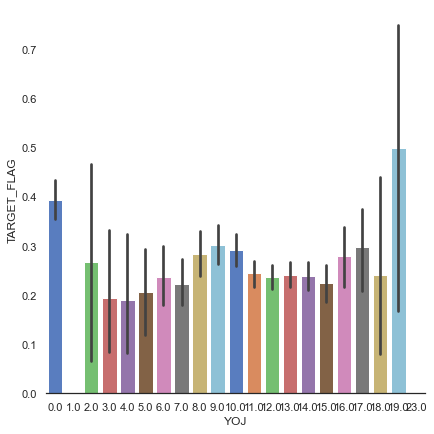

In [168]:
train_set['YOJ'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="YOJ",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")
#g = g.set(xlim=(0,25000),ylim=(0,200))

Relatively constant when YOJ>0, except for YOJ>20 but very few values. Create binary variable

In [169]:
corr_matrix=train_set.corr()
corr_matrix["YOJ"].sort_values(ascending=False)

YOJ            1.000000
INCOME         0.286074
HOME_VAL       0.269920
BLUEBOOK       0.143465
AGE            0.136072
HOMEKIDS       0.086829
CAR_AGE        0.061406
KIDSDRIV       0.043305
INDEX          0.026733
TIF            0.024787
OLDCLAIM      -0.002980
TRAVTIME      -0.016945
CLM_FREQ      -0.026308
MVR_PTS       -0.037855
TARGET_FLAG   -0.070512
Name: YOJ, dtype: float64

YOJ correlated with INCOME and HOME_VAL. But to fill missing values based on the median would be difficult as there are a lot of missing values in these two variables. 

### Car Age

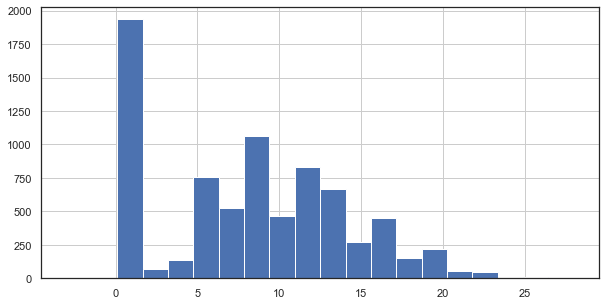

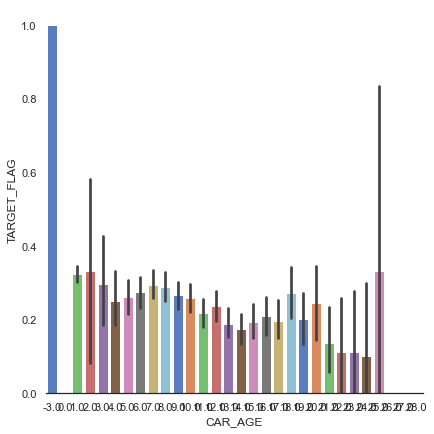

In [170]:
train_set['CAR_AGE'].hist(bins=20, figsize=(10,5))
plt.show
g = sns.catplot(x="CAR_AGE",y="TARGET_FLAG",data=train_set,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("TARGET_FLAG")
#g = g.set(xlim=(0,25000),ylim=(0,200))

-3 is an error, lots of new car. CAR_age does not influence much  target_flag, a bit decreasing with car_age. We drop this column

### HOME_VAL

In [172]:
corr_matrix=train_set.corr()
corr_matrix["HOME_VAL"].sort_values(ascending=False)

HOME_VAL       1.000000
INCOME         0.575244
YOJ            0.269920
BLUEBOOK       0.259533
CAR_AGE        0.217468
AGE            0.209984
INDEX          0.012109
TIF            0.002063
KIDSDRIV      -0.019792
TRAVTIME      -0.035525
OLDCLAIM      -0.069195
MVR_PTS       -0.085395
CLM_FREQ      -0.094049
HOMEKIDS      -0.110680
TARGET_FLAG   -0.183737
Name: HOME_VAL, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

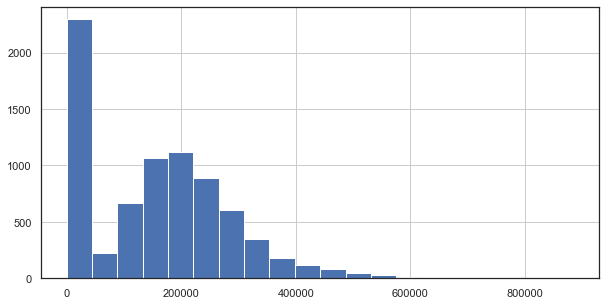

In [173]:
train_set['HOME_VAL'].hist(bins=20, figsize=(10,5))
plt.show


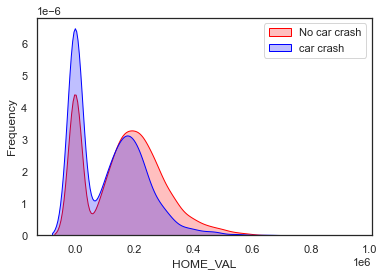

In [174]:
g = sns.kdeplot(train_set["HOME_VAL"][(train_set["TARGET_FLAG"] == 0) & (train_set["HOME_VAL"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_set["HOME_VAL"][(train_set["TARGET_FLAG"] == 1) & (train_set["HOME_VAL"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("HOME_VAL")
g.set_ylabel("Frequency")
g = g.legend(["No car crash","car crash"])

##### Renter have more car accidents

Lots of non-home owner. For Home_val >0, not much change. I suggest change it to binary : if home_val =0 or not

In [175]:
train_set.loc[train_set['HOME_VAL'].isna(),:].describe(include=['O'])

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,464,464,464,464,426,464,464,464,464,464
unique,2,2,2,5,8,2,6,2,2,2
top,No,Yes,z_F,z_High School,z_Blue Collar,Private,z_SUV,no,No,Highly Urban/ Urban
freq,411,284,247,125,102,279,129,330,408,373


In [176]:
train_set.loc[train_set['HOME_VAL'].isna(),:].describe()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,464.000000,464.000000,464.000000,462.000000,464.000000,437.000000,431.000000,0.0,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,428.000000
mean,5515.247845,0.260776,0.146552,45.244589,0.635776,10.382151,61961.136891,NaN,32.881466,15525.581897,5.241379,4148.273707,0.857759,1.864224,8.481308
std,2819.033350,0.439532,0.445846,8.373256,1.057163,4.157226,50364.619787,NaN,14.985701,8555.661261,4.370272,8536.921038,1.137057,2.252163,5.625896
min,8.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,NaN,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3211.500000,0.000000,0.000000,39.000000,0.000000,9.000000,27582.000000,NaN,22.000000,8555.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,5549.000000,0.000000,0.000000,45.000000,0.000000,11.000000,53140.000000,NaN,32.500000,14115.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7843.250000,1.000000,0.000000,51.000000,1.000000,13.000000,84550.000000,NaN,43.000000,21157.500000,7.000000,4817.000000,2.000000,3.000000,12.000000
max,10275.000000,1.000000,3.000000,70.000000,4.000000,17.000000,284071.000000,NaN,80.000000,49880.000000,21.000000,49422.000000,4.000000,11.000000,24.000000


We see that missing values are mostly for not single parents and married people, which tend to have less accidents. For missing values, we may fill them with value = 1, because single parents and married people mostly have home value >0

# Categorical columns

In [177]:
cat_cols

['PARENT1',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'CAR_USE',
 'CAR_TYPE',
 'RED_CAR',
 'REVOKED',
 'URBANICITY']

- Quick view : SEX and RED_car does not seem to have influence. Drop them

- For the other binary variables, change them into (0,1)

- People with minivan have less accidents. Other car, similar probability

- Single Parent have more accidents

- Not married people have more accidents

- No distinction between Male and Female

- Commercial cars have more accidents : they travel more often, logical

- People with license revoked have more accident, which makes sense

- People living in the city have more accidents, they indeed tend to encounter more cars, and there is more traffic which increases the probability of accidents


In [178]:
for col in cat_cols:
    print(train_set[[col, 'TARGET_FLAG']].groupby([col], as_index=False).mean().sort_values(by='TARGET_FLAG', ascending=False))

  PARENT1  TARGET_FLAG
1     Yes     0.441968
0      No     0.236731
  MSTATUS  TARGET_FLAG
1    z_No     0.336700
0     Yes     0.215161
   SEX  TARGET_FLAG
1  z_F     0.272457
0    M     0.253830
       EDUCATION  TARGET_FLAG
4  z_High School     0.340343
0   <High School     0.320033
1      Bachelors     0.233274
2        Masters     0.197226
3            PhD     0.171703
             JOB  TARGET_FLAG
6        Student     0.373596
7  z_Blue Collar     0.347397
0       Clerical     0.291896
2     Home Maker     0.280811
5   Professional     0.221128
3         Lawyer     0.183234
4        Manager     0.138664
1         Doctor     0.117886
      CAR_USE  TARGET_FLAG
0  Commercial     0.345659
1     Private     0.215511
      CAR_TYPE  TARGET_FLAG
3   Sports Car     0.335171
2       Pickup     0.318934
5        z_SUV     0.295554
4          Van     0.268000
1  Panel Truck     0.263314
0      Minivan     0.162704
  RED_CAR  TARGET_FLAG
0      no     0.265779
1     yes     0.259041
  REVO

Let us look at the non-binary value categorical variables

### EDUCATION

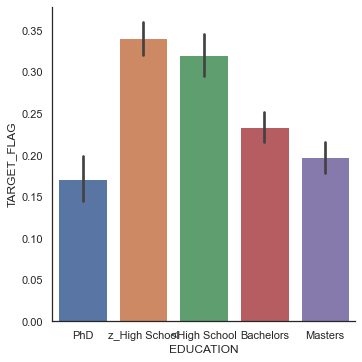

In [179]:
g = sns.catplot(x="EDUCATION",y="TARGET_FLAG",data=train_set,kind="bar")

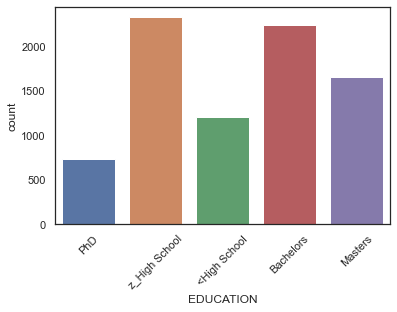

In [180]:
g = sns.countplot(x="EDUCATION",data=train_set)
g = plt.setp(g.get_xticklabels(), rotation=45) 

I suggest we transform it: regroup phd masters and bachelors. Thus 3 categories that we one-hot encod

### JOB

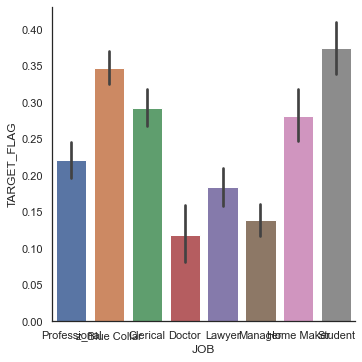

In [181]:
g = sns.catplot(x="JOB",y="TARGET_FLAG",data=train_set,kind="bar")

WE find that student and blue collar have more car accidents

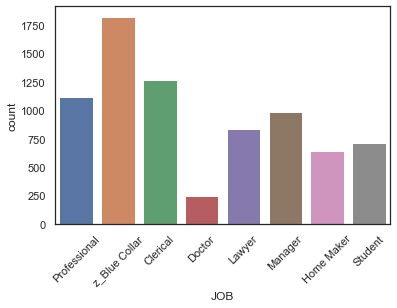

In [182]:
g = sns.countplot(x="JOB",data=train_set)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [183]:
train_set[['JOB', 'TARGET_FLAG']].groupby(['JOB'], as_index=False).mean().sort_values(by='TARGET_FLAG', ascending=False)

,JOB,TARGET_FLAG
6,Student,0.373596
7,z_Blue Collar,0.347397
0,Clerical,0.291896
2,Home Maker,0.280811
5,Professional,0.221128
3,Lawyer,0.183234
4,Manager,0.138664
1,Doctor,0.117886


I suggest to group Lawyer, Manager, Doctor and keep five columns. We will do One-Hot Encoding

## MSTATUS

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


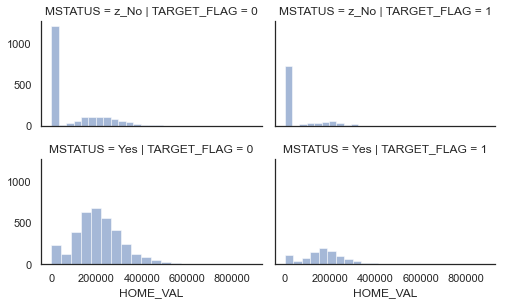

In [184]:
grid = sns.FacetGrid(train_set, col='TARGET_FLAG', row='MSTATUS', size=2.2, aspect=1.6)
grid.map(plt.hist, 'HOME_VAL', alpha=.5, bins=20)
grid.add_legend();

 ##### Majority of not married are home renter

## PARENT1

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


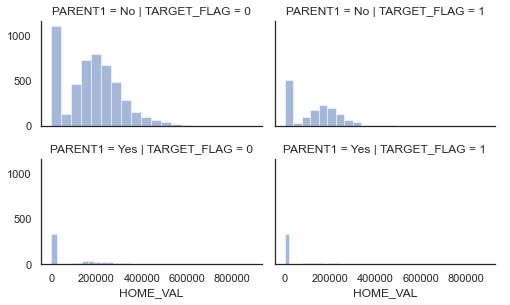

In [185]:
grid = sns.FacetGrid(train_set, col='TARGET_FLAG', row='PARENT1', size=2.2, aspect=1.6)
grid.map(plt.hist, 'HOME_VAL', alpha=.5, bins=20)
grid.add_legend();

##### Single parent are in a large majority home owner

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


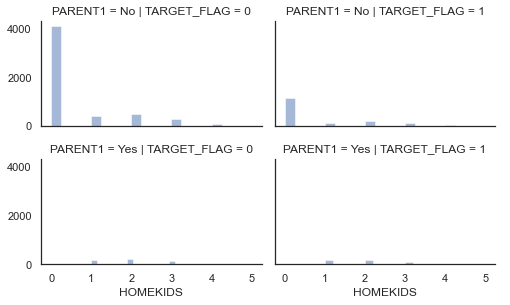

In [186]:
grid = sns.FacetGrid(train_set, col='TARGET_FLAG', row='PARENT1', size=2.2, aspect=1.6)
grid.map(plt.hist, 'HOMEKIDS', alpha=.5, bins=20)
grid.add_legend();

#### From this, we can see a correlation between home value, single parent and not married people

We might create a variable with the 3, where the least is unmarried single parent renter

# Fill missing values

### Age

There are only 6 missing values. We replace them with the median value

In [187]:
train_set['AGE'].fillna(train_set['AGE'].dropna().median(), inplace=True)
test_set['AGE'].fillna(test_set['AGE'].dropna().median(), inplace=True)

In [199]:
train_df=train_set.copy()
test_df=test_set.copy()

### YOJ, INCOME and HOME_VAL

We have an issue because these 3 variables are highly correlated. 

For YOJ and HOME_VAL, as they will be converted to binary variables, we can take the most frequent value. 

For Income, we will do strategy = median for a Simple Imputer

# Feature Engineering

We now transform our variables. Let us summarize for our first model

## 1st Model

### Numeric columns

- Kidsdrive : convert to binary for kidsdrive larger than 0
- Home kids : convert to binary
- YOJ : convert to binary, differentiate between YOJ =0 or not
- Income: keep this column, log normalize as it is right skewed
- travtime : keep this column
- bluebook : keep this column
- Old claim : drop it
- Clm_freq : convert to binary
- Car_age : drop
- Age : convert to binary, people older or not than 26
- Home_val : convert to 0,1 for homeowner or not
- TIF : drop it
- MVR_PTS : keep it, bandwidth

### Categorical columns

- Parent1 : convert to binary
- Mstatus : convert to binary
- Sex : drop
- Car_use : convert to binary
- red_car : drop
- Car use : convert to binary
- Revoked : convert to binary
- Education : convert to 3 categories : <High school, High school and >High school  
- Car type = minivan or not
- urbanicity : 0 ou 1
- JOB : we regroup Doctor, Lawyer and Manager                        
                                       

In [200]:
for dataset in (train_df,test_df):
    
    # Convert to binary
    for col in ['HOMEKIDS','KIDSDRIV','CLM_FREQ','YOJ','HOME_VAL']:
        dataset.loc[ dataset[col] <= 0, col] = 0
        dataset.loc[(dataset[col] > 0) , col] = 1
        
    dataset.loc[ dataset['AGE'] <= 26, 'AGE'] = 0
    dataset.loc[(dataset['AGE'] > 26) , 'AGE'] = 1 
    
    #Log normalize income
    dataset["log income"] = dataset["INCOME"].map(lambda i: np.log(i+1))

    dataset.drop(['INCOME'],axis=1,inplace=True)

    # Rename columns
    dataset.rename(columns={"HOMEKIDS": "Kids at home", "KIDSDRIV": "Driving Kids", "CLM_FREQ":"Past claim","YOJ":"On job not new",
                            "AGE" :"Old","MVR_PTS":"Motor vehicle record points","HOME_VAL":"Home value", "TRAVTIME" : "Time to work",
                           "BLUEBOOK":"Car value"},inplace=True)
    
    # Drop tif, car age and oldclaim
    dataset.drop(['TIF','CAR_AGE','OLDCLAIM'],axis=1,inplace=True)
    
    

In [201]:
for dataset in (train_df,test_df):
    for col in ['PARENT1','REVOKED']:
        dataset[col] = dataset[col].astype('category')
        dataset[col]=dataset[col].cat.codes
        
    dataset["URBANICITY"] = dataset["URBANICITY"].map({"Highly Urban/ Urban" : 1, "z_Highly Rural/ Rural":0}) 
    dataset["MSTATUS"] = dataset["MSTATUS"].map({"z_No" : 0, "Yes":1})    
    dataset["CAR_USE"] = dataset["CAR_USE"].map({"Private" : 0, "Commercial":1}) 
    #dataset["EDUCATION"] = dataset["EDUCATION"].map({"Bachelors" : ">High School", "Masters":">High school", "PhD":">High school"})
    dataset["EDUCATION"] = dataset["EDUCATION"].replace(['Bachelors', 'Masters','PhD'], '>High school')
    dataset["EDUCATION"] = dataset["EDUCATION"].map({"<High School" : 0, "z_High School":1, ">High school":2})
    dataset["JOB"] = dataset["JOB"].map({"Doctor" : "DLM", "Lawyer":"DLM", "Manager":"DLM", "Home Maker":"H", 
                                         "z_Blue Collar":"B","Clerical":'C', "Student":"S","Professional":"P"})
    
    dataset["CAR_TYPE"] = dataset["CAR_TYPE"].map({"z_SUV":0, "Sports Car":0, "Van" : 0 , "Panel Truck":0, "Pickup":0, "Minivan":1})
    dataset["CAR_TYPE"] = dataset["CAR_TYPE"].astype(int)
    
    dataset.drop(['RED_CAR','SEX'],axis=1,inplace=True)
    dataset.rename(columns={"PARENT1": "Single Parent", "MSTATUS": "Married", "CAR_USE":"Commercial","REVOKED":"License revoked",
                            "URBANICITY":"Urban","EDUCATION" :"Education","CAR_TYPE":"Minivan","JOB":"Job"},inplace=True)
    


We drop Index column as it is not useful for us in the training set

In [203]:
train_df.drop(['INDEX'],axis=1,inplace=True)

# Pipeline

We will create a pipeline

Let us summarize what we need to do:
- Income we find the missing values by considering the median
- Then binarize Home_val and On job: if >0 then 1. Find the missing values by most frequent
- For job  One-hot Encoding
- For job, for the missing values, we can take the most frequent 

In [204]:
X_train=train_df.drop(['TARGET_FLAG'],axis=1)
Y_train=train_df['TARGET_FLAG']

INDEX = test_df["INDEX"]
X_test=test_df.drop(['INDEX','TARGET_FLAG'],axis=1)

### Construction of 1st model 

#### Let us summarize what we have

- Driving kids : convert to binary for kidsdrive larger than 0
- Old : binary for people older or not than 26
- Kids at home : binary for larger than 0
- Single parent : binary
- Home value : binary for larger than 0
- Married : binary 
- Education : 3 values from least to highest educated
- Job: One hot encoding, we keep the 5 values for now
- Time to work : we keep it and we scale it later
- Commercial : binary
- Car value : keep it and scale it later
- Minivan : binary
- Past claim : binary
- License revoked : binary
- Motor vehicle record points : linear
- Urban : binary
- log income : log income to compensate for right-skewness

##### We will use cross validation because we have a small number of data and with Pipeline, we don't need to split the train into train and validation

#### We create a Pipeline

We split columns into 3 parts

In [206]:
X_train.head()

,Driving Kids,Old,Kids at home,On job not new,Single Parent,Home value,Married,Education,Job,Time to work,Commercial,Car value,Minivan,Past claim,License revoked,Motor vehicle record points,Urban,log income
0,0,1.0,0,1.0,0,0.0,0,2,P,14,0,14230.0,1,1,0,3,1,11.117658
1,0,1.0,0,1.0,0,1.0,0,1,B,22,1,14940.0,1,0,0,0,1,11.423548
2,0,1.0,1,1.0,0,1.0,1,1,C,5,0,4010.0,0,1,0,3,1,9.682841
3,0,1.0,0,1.0,0,1.0,1,0,B,32,0,15440.0,1,0,0,0,1,NaN
4,0,1.0,0,NaN,0,1.0,1,2,DLM,36,0,18000.0,0,1,1,3,1,11.652574


In [207]:
num_cols=[col for col in X_train.columns if X_train[col].dtypes != 'object']
cat_cols=[col for col in X_train.columns if X_train[col].dtypes == 'object']
num_median_attribs = ["log income","Car value"]
#num_median_attribs = ["log income"]
#num_binarizer_attribs=["Home value","On job"]
num_other_attribs = list(set(num_cols)-set(num_median_attribs))
cat_attribs=cat_cols
cat_cols

['Job']

In [208]:

num_median_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

#num_binarizer_pipeline = Pipeline([
#        ('binarizer', Binarizer(threshold=0)),
#        ('std_scaler', StandardScaler()),
#    ])

num_other_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [209]:
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
        ("num_median", num_median_pipeline, num_median_attribs),
        ("num_frequent", num_other_pipeline, num_other_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
#X_valid_prepared = full_pipeline.transform(X_valid)

We use cross val because of small dataset and it enables us to navigate over all training set for eval

In [210]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

##### Let's begin with a simple classifier : Logistic regression

In [211]:
random_state = 2
classifier_logistic=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', LogisticRegression(random_state = random_state))])
cross_val_score(classifier_logistic, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4).mean()


0.6644833144544882

#### Let us find the correlation between our columns and the output

In [212]:
X_train_prepared_pd=pd.DataFrame(X_train_prepared)
tot_cols=list(num_median_attribs+num_other_attribs+['Job_B','Job_C' ,'Job_DLM','Job_H','Job_P','Job_S'])
X_train_prepared_pd.columns=tot_cols

In [213]:
classifier=LogisticRegression(random_state=random_state)

cross_val_score(classifier, X_train_prepared, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4).mean()
classifier.fit(X_train_prepared,Y_train)

coeff_df = pd.DataFrame(X_train_prepared_pd.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Urban,0.940332
10,Commercial,0.324707
18,Job_C,0.313007
17,Job_B,0.253887
11,License revoked,0.246639
4,Time to work,0.236387
12,Motor vehicle record points,0.212616
13,Past claim,0.209027
6,Driving Kids,0.204333
7,Kids at home,0.084750


We find Positively correlated with Target_flag :
- Urban
- Commercial
- License revoked
- Time to work
- Record points
- Past claims
- Driving kids

All is logical

Negatively correlated: 
- Old
- Education
- Income
- Home value
- Minivan
- Car value

For the job, everything is fine except the variable Student that is negatively correlated with Target_flag

We see that kids at home, single parent and home_value do not have much influence. In the 2nd model, we will combine them in one column

In [214]:
# Gaussian Naive Bayes
classifier_bayes=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', GaussianNB())])
cross_val_score(classifier_bayes, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4).mean()



0.5507617064017745

In [ ]:
nrows = ncols = 2
#fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))


indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train_prepared_pd.columns[indices][:40],x = classifier.feature_importances_[indices][:40],orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)


Let's see with a random forest classifier

In [215]:
random_state = 2
classifier_randomforest=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', RandomForestClassifier(random_state=random_state))])
cross_val_score(classifier_randomforest, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4)

array([0.59574468, 0.6015625 , 0.65605096, 0.66666667, 0.59558824,
       0.60465116, 0.63114754, 0.71212121, 0.65441176, 0.63934426])

### Let's see for a lot of classifiers which ones perform the best

c:\users\pierre lecointre\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


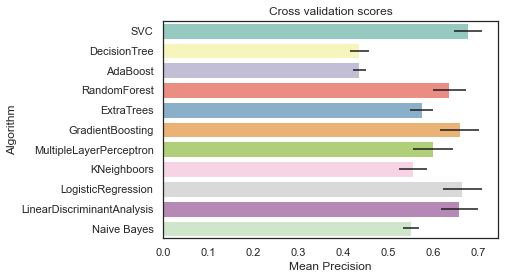

In [216]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())
cv_results = []
for classifier in classifiers :
    classifier_pipeline=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', classifier)])
    cv_results.append(cross_val_score(classifier_pipeline, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","Naive Bayes"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Precision")
g = g.set_title("Cross validation scores")

##### SVC, Random Forest, Gradient Boosting, Logistic regression and LDA are the best

## Grid Search

We perform grid search on some classifiers

In [217]:
# Logistic regression

LR = LogisticRegression()


classifier_LR=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('lr', LR)])
param_grid={"lr__C":np.logspace(-3,3,7), "lr__penalty":["l1","l2"]}# l1 lasso l2 ridge

gsLR = GridSearchCV(classifier_LR,param_grid, cv=kfold, scoring="precision", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,Y_train)
print("Best parameter (CV score=%0.3f):" % gsLR.best_score_)
print(gsLR.best_params_)

LR_best = gsLR.best_estimator_

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best parameter (CV score=0.728):
{'lr__C': 0.001, 'lr__penalty': 'l2'}


c:\users\pierre lecointre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.72811635        nan 0.67509999        nan 0.66684255
        nan 0.66448331        nan 0.66359531        nan 0.66359531
        nan 0.66359531]
  warnings.warn(


In [218]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

classifier_randomforest=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('rfc', RFC)])
#cross_val_score(classifier_randomforest, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4)
## Search grid for optimal parameters
param_grid = {"rfc__max_depth": [None],
              "rfc__max_features": [1, 3, 10],
              "rfc__min_samples_split": [2, 3, 10],
              "rfc__min_samples_leaf": [1, 3, 10],
              "rfc__bootstrap": [False],
              "rfc__n_estimators" :[100,300],
              "rfc__criterion": ["gini"]}

gsRFC = GridSearchCV(classifier_randomforest, param_grid, n_jobs=4,scoring = "precision",cv =kfold)
gsRFC.fit(X_train, Y_train)
print("Best parameter (CV score=%0.3f):" % gsRFC.best_score_)
print(gsRFC.best_params_)
RFC_best = gsRFC.best_estimator_

Best parameter (CV score=0.765):
{'rfc__bootstrap': False, 'rfc__criterion': 'gini', 'rfc__max_depth': None, 'rfc__max_features': 1, 'rfc__min_samples_leaf': 10, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 100}


In [219]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
classifier_gbc=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('gbc', GBC)])
param_grid = {'gbc__loss' : ["deviance"],
              'gbc__n_estimators' : [100,200,300],
              'gbc__learning_rate': [0.1, 0.05, 0.01],
              'gbc__max_depth': [4, 8],
              'gbc__min_samples_leaf': [100,150],
              'gbc__max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(classifier_gbc, param_grid, n_jobs=4,scoring = "precision",cv =kfold)
gsGBC.fit(X_train, Y_train)
print("Best parameter (CV score=%0.3f):" % gsGBC.best_score_)
print(gsGBC.best_params_)
GBC_best = gsGBC.best_estimator_


Best parameter (CV score=0.862):
{'gbc__learning_rate': 0.01, 'gbc__loss': 'deviance', 'gbc__max_depth': 4, 'gbc__max_features': 0.3, 'gbc__min_samples_leaf': 150, 'gbc__n_estimators': 100}


In [220]:
# SVC tunning

### SVC classifier
SVMC = SVC(probability=True)


classifier_svmc=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('svmc', SVMC)])
param_grid = {'svmc__kernel': ['rbf'], 
                'svmc__gamma': [ 0.001, 0.01, 0.1, 1],
                'svmc__C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(classifier_svmc, param_grid, n_jobs=-1,scoring = "precision",cv =kfold)
gsSVMC.fit(X_train, Y_train)
print("Best parameter (CV score=%0.3f):" % gsSVMC.best_score_)
print(gsSVMC.best_params_)
SVMC_best = gsSVMC.best_estimator_


Best parameter (CV score=0.767):
{'svmc__C': 1, 'svmc__gamma': 0.001, 'svmc__kernel': 'rbf'}


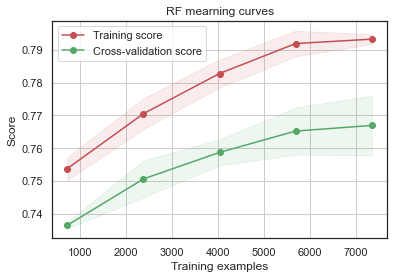

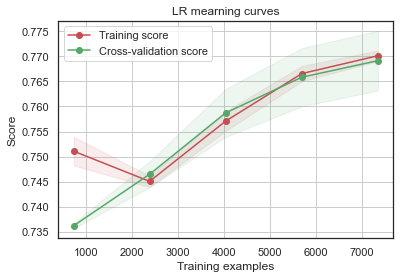

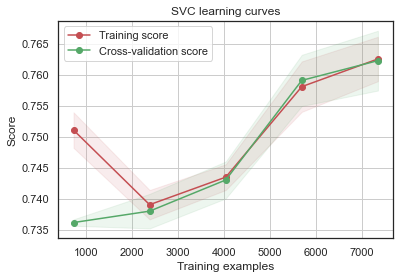

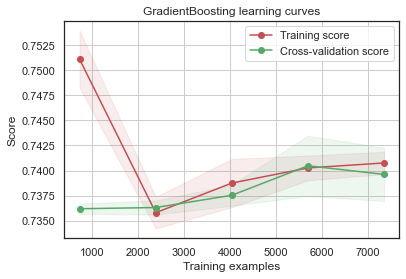

In [221]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"LR mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

We see that the score will go on increasing for more training examples. We may have overfitting for GBC and SVC. Let's use a voting classifier

In [235]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
('svc', SVMC_best), ('lr',LR_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [222]:
print("Best parameter (CV score=%0.3f):" % gsGBC.best_score_)
print(gsGBC.best_params_)

Best parameter (CV score=0.862):
{'gbc__learning_rate': 0.01, 'gbc__loss': 'deviance', 'gbc__max_depth': 4, 'gbc__max_features': 0.3, 'gbc__min_samples_leaf': 150, 'gbc__n_estimators': 100}


In [236]:
Y_test = votingC.predict(X_test)
results=pd.DataFrame({
        "INDEX": INDEX,
        "TARGET_FLAG": Y_test
    })


results.to_csv("predictions_model1.csv",index=False)

# 2nd Model

Let's see what happens if we regroup mstatus, home_val and parent1

We create a new variable married_single_owner where it is 0 when single, single parent and renter because they have highest proba of cash
We then increase by 1 for every permutation
Married, not single parent and owner have a score = 3

In [224]:
train_df_2=train_set.copy()
test_df_2=test_set.copy()

In [225]:
for dataset in (train_df_2,test_df_2):
    
    for col in ['HOMEKIDS','KIDSDRIV','CLM_FREQ','YOJ','HOME_VAL']:
        dataset.loc[ dataset[col] <= 0, col] = 0
        dataset.loc[(dataset[col] > 0) , col] = 1
        
    dataset.loc[ dataset['AGE'] <= 26, 'AGE'] = 0
    dataset.loc[(dataset['AGE'] > 26) , 'AGE'] = 1

    #Log normalize income
    dataset["log income"] = dataset["INCOME"].map(lambda i: np.log(i+1))

    dataset.drop(['INCOME'],axis=1,inplace=True)

    # Rename columns
    dataset.rename(columns={"HOMEKIDS": "Kids at home", "KIDSDRIV": "Driving Kids", "CLM_FREQ":"Past claim","YOJ":"On job not new",
                            "AGE" :"Old","MVR_PTS":"Motor vehicle record points", "TRAVTIME" : "Time to work",
                           "BLUEBOOK":"Car value"},inplace=True)

    dataset.drop(['TIF','CAR_AGE','OLDCLAIM'],axis=1,inplace=True)
    
    
    for col in ['REVOKED']:
        dataset[col] = dataset[col].astype('category')
        dataset[col]=dataset[col].cat.codes
        
    dataset['married_single_owner']=0    
    dataset['HOME_VAL'].fillna(1, inplace=True)    
    dataset.loc[ (dataset['PARENT1'] == 'Yes') & (dataset['MSTATUS'] == 'z_No') & (dataset['HOME_VAL'] == 0), 'married_single_owner'] = 0
    dataset.loc[ (dataset['PARENT1'] == 'Yes') & (dataset['MSTATUS'] == 'Yes') & (dataset['HOME_VAL'] == 0), 'married_single_owner'] = 1
    dataset.loc[ (dataset['PARENT1'] == 'Yes') & (dataset['MSTATUS'] == 'z_No') & (dataset['HOME_VAL'] == 1), 'married_single_owner'] = 1
    dataset.loc[ (dataset['PARENT1'] == 'No') & (dataset['MSTATUS'] == 'Yes') & (dataset['HOME_VAL'] == 1), 'married_single_owner'] = 3
    dataset.loc[ (dataset['PARENT1'] == 'No') & (dataset['MSTATUS'] == 'z_No') & (dataset['HOME_VAL'] == 1), 'married_single_owner'] = 2
    dataset.loc[ (dataset['PARENT1'] == 'No') & (dataset['MSTATUS'] == 'Yes') & (dataset['HOME_VAL'] == 0), 'married_single_owner'] = 2
    dataset.loc[ (dataset['PARENT1'] == 'Yes') & (dataset['MSTATUS'] == 'Yes') & (dataset['HOME_VAL'] == 1), 'married_single_owner'] = 2
    dataset.loc[ (dataset['PARENT1'] == 'No') & (dataset['MSTATUS'] == 'z_No') & (dataset['HOME_VAL'] == 1), 'married_single_owner'] = 1

        
    dataset["URBANICITY"] = dataset["URBANICITY"].map({"Highly Urban/ Urban" : 1, "z_Highly Rural/ Rural":0}) 
    dataset["MSTATUS"] = dataset["MSTATUS"].map({"z_No" : 0, "Yes":1})    
    dataset["CAR_USE"] = dataset["CAR_USE"].map({"Private" : 0, "Commercial":1}) 
    dataset["EDUCATION"] = dataset["EDUCATION"].replace(['Bachelors', 'Masters','PhD'], '>High school')
    dataset["EDUCATION"] = dataset["EDUCATION"].map({"<High School" : 0, "z_High School":1, ">High school":2})
    dataset["JOB"] = dataset["JOB"].map({"Doctor" : "DLM", "Lawyer":"DLM", "Manager":"DLM", "Home Maker":"H", 
                                         "z_Blue Collar":"B","Clerical":'C', "Student":"S","Professional":"P"})
    
    dataset["CAR_TYPE"] = dataset["CAR_TYPE"].map({"z_SUV":0, "Sports Car":0, "Van" : 0 , "Panel Truck":0, "Pickup":0, "Minivan":1})
    dataset["CAR_TYPE"] = dataset["CAR_TYPE"].astype(int)
    
    dataset.drop(['RED_CAR','SEX','MSTATUS','PARENT1','HOME_VAL'],axis=1,inplace=True)
    dataset.rename(columns={ "CAR_USE":"Commercial","REVOKED":"License revoked",
                            "URBANICITY":"Urban","EDUCATION" :"Education","CAR_TYPE":"Minivan","JOB":"Job"},inplace=True)
    
train_df_2.drop(['INDEX'],axis=1,inplace=True)

In [226]:
X_train_model2=train_df_2.drop(['TARGET_FLAG'],axis=1)
Y_train_model2=train_df_2['TARGET_FLAG']
INDEX_2 = test_df_2["INDEX"]
X_test_2=test_df_2.drop(['INDEX','TARGET_FLAG'],axis=1)

In [227]:
X_train_model2.columns

Index(['Driving Kids', 'Old', 'Kids at home', 'On job not new', 'Education',
       'Job', 'Time to work', 'Commercial', 'Car value', 'Minivan',
       'Past claim', 'License revoked', 'Motor vehicle record points', 'Urban',
       'log income', 'married_single_owner'],
      dtype='object')

In [228]:
num_cols_model2=[col for col in X_train_model2.columns if X_train_model2[col].dtypes != 'object']
cat_cols_model2=[col for col in X_train_model2.columns if X_train_model2[col].dtypes == 'object']
num_median_attribs_model2 = ["log income","Car value"]

num_other_attribs_model2 = list(set(num_cols_model2)-set(num_median_attribs_model2))
cat_attribs_model2=cat_cols_model2
cat_cols_model2

['Job']

In [229]:

num_median_pipeline_model2 = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])


num_other_pipeline_model2 = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline_model2=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])


full_pipeline_model2 = ColumnTransformer([
        ("num_median", num_median_pipeline_model2, num_median_attribs_model2),
        ("num_frequent", num_other_pipeline_model2, num_other_attribs_model2),
        ("cat", cat_pipeline_model2, cat_attribs_model2),
    ])

X_train_prepared_model2 = full_pipeline_model2.fit_transform(X_train_model2)
#X_valid_prepared = full_pipeline.transform(X_valid)

In [230]:
random_state = 2
classifier_logistic=Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', LogisticRegression(random_state = random_state))])
cross_val_score(classifier_logistic, X_train, y = Y_train, scoring = "precision", cv = kfold, n_jobs=4).mean()


0.6644833144544882

Let's look at the correlation of features with target_flag

In [232]:
X_train_prepared_pd_model2=pd.DataFrame(X_train_prepared_model2)
tot_cols=list(num_median_attribs_model2+num_other_attribs_model2+['Job_B','Job_C' ,'Job_DLM','Job_H','Job_P','Job_S'])
X_train_prepared_pd_model2.columns=tot_cols

In [233]:
classifier=LogisticRegression(random_state=random_state)

cross_val_score(classifier, X_train_prepared_model2, y = Y_train_model2, scoring = "precision", cv = kfold, n_jobs=4).mean()
classifier.fit(X_train_prepared_model2,Y_train_model2)

coeff_df = pd.DataFrame(X_train_prepared_pd_model2.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Urban,0.938058
13,Commercial,0.323950
16,Job_C,0.309864
15,Job_B,0.253180
14,License revoked,0.246710
4,Time to work,0.235691
3,Motor vehicle record points,0.213060
5,Past claim,0.207924
6,Driving Kids,0.202049
7,Kids at home,0.130432


We see now that the new variable married_single_owner is highly negatively correlated with Target_flag which is logical

Let's see with Gradient Boosting what it gives us 

In [234]:
# Gradient boosting tunning

GBC_model2 = GradientBoostingClassifier()
classifier_gbc_model2=Pipeline(steps=[
    ('preprocessor', full_pipeline_model2),
    ('gbc', GBC)])
param_grid = {'gbc__loss' : ["deviance"],
              'gbc__n_estimators' : [100,200,300],
              'gbc__learning_rate': [0.1, 0.05, 0.01],
              'gbc__max_depth': [4, 8],
              'gbc__min_samples_leaf': [100,150],
              'gbc__max_features': [0.3, 0.1] 
              }

gsGBC_model2 = GridSearchCV(classifier_gbc_model2, param_grid, n_jobs=-1,scoring = "precision",cv =kfold)
gsGBC_model2.fit(X_train_model2, Y_train_model2)
print("Best parameter (CV score=%0.3f):" % gsGBC_model2.best_score_)
print(gsGBC_model2.best_params_)
GBC_model2_best = gsGBC_model2.best_estimator_

Best parameter (CV score=0.852):
{'gbc__learning_rate': 0.01, 'gbc__loss': 'deviance', 'gbc__max_depth': 8, 'gbc__max_features': 0.3, 'gbc__min_samples_leaf': 150, 'gbc__n_estimators': 100}


We have a slightly lower CV score. We keep the first model

In [ ]:
Y_test_2 = GBC_model2best.predict(X_test_2)
results=pd.DataFrame({
        "INDEX": INDEX_2,
        "TARGET_FLAG": Y_test_2
    })


results.to_csv("predictions_model2.csv",index=False)

## Last comment 

To further improve the model, we maybe should have dropped the column job